In [9]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [10]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [11]:
mnist.train.images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [12]:
mnist.train.images.shape

(55000, 784)

In [7]:
mnist.train.images[1]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [8]:
mnist.train.images[1].shape

(784,)

In [16]:
mnist.train.images[1].reshape(28,28)


array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.    

In [17]:
sample = mnist.train.images[1].reshape(28,28)

In [13]:
import matplotlib.pyplot as plt

In [14]:
%matplotlib inline

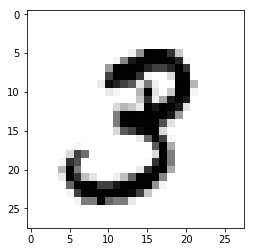

In [18]:
plt.imshow(sample, cmap="Greys")

In [63]:
learning_rate = 0.001
training_epochs =50
batch_size = 100

In [20]:
n_classes =10

In [21]:
n_samples = mnist.train.num_examples

In [22]:
n_input = 784

In [23]:
n_hidden_1 = 256
n_hidden_2 = 256

In [24]:
def multilayer_perceptron(x, weights, biases):
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    out_layer = tf.matmul(layer_2, weights['out']) + biases ['out']
    return out_layer
                     

In [28]:
weights = {
    
    'h1' : tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2' : tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out' :tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

In [29]:
biases = {
    
    'b1' : tf.Variable(tf.random_normal([ n_hidden_1])),
    'b2' : tf.Variable(tf.random_normal([ n_hidden_2])),
    'out' :tf.Variable(tf.random_normal([ n_classes]))
}


In [32]:
x = tf.placeholder('float', [None, n_input])

In [33]:
y = tf.placeholder('float', [None, n_classes])

In [34]:
pred = multilayer_perceptron(x, weights, biases)

In [61]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels =y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

In [43]:

t = mnist.train.next_batch(12)

In [42]:
t

(array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.

In [44]:
xsamp, ysamp = t

In [47]:
xsamp[1]


array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [48]:
ysamp[1]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.])

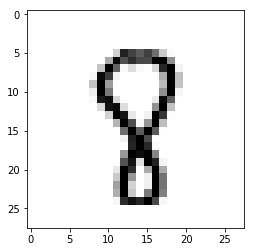

In [51]:
plt.imshow(xsamp[1].reshape(28,28), cmap="Greys")

In [52]:
sess = tf.InteractiveSession()

In [53]:
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [54]:
sess.run(init)

In [64]:
for epochs in range(training_epochs):
    avg_cost = 0.0
    total_batch = int (n_samples/batch_size)
    
    for i in range(total_batch):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        _,c = sess.run([optimizer,cost], feed_dict={x:batch_x, y:batch_y})
        
        avg_cost+= c/total_batch
        
    print("Epoch : {}  Cost {:.4f}".format(epochs+1, avg_cost))
    
print("Model has completed {} epochs of training".format(training_epochs))
        

Epoch : 1  Cost 11.2993
Epoch : 2  Cost 10.5745
Epoch : 3  Cost 10.1323
Epoch : 4  Cost 9.5766
Epoch : 5  Cost 9.1653
Epoch : 6  Cost 8.7224
Epoch : 7  Cost 8.2928
Epoch : 8  Cost 7.9224
Epoch : 9  Cost 7.5498
Epoch : 10  Cost 7.2330
Epoch : 11  Cost 6.9422
Epoch : 12  Cost 6.6907
Epoch : 13  Cost 6.4228
Epoch : 14  Cost 6.1314
Epoch : 15  Cost 5.9358
Epoch : 16  Cost 5.7204
Epoch : 17  Cost 5.5132
Epoch : 18  Cost 5.2917
Epoch : 19  Cost 5.1106
Epoch : 20  Cost 4.9463
Epoch : 21  Cost 4.7821
Epoch : 22  Cost 4.5971
Epoch : 23  Cost 4.4525
Epoch : 24  Cost 4.3143
Epoch : 25  Cost 4.1793
Epoch : 26  Cost 4.0457
Epoch : 27  Cost 3.9196
Epoch : 28  Cost 3.8239
Epoch : 29  Cost 3.6855
Epoch : 30  Cost 3.5515
Epoch : 31  Cost 3.4771
Epoch : 32  Cost 3.3625
Epoch : 33  Cost 3.2417
Epoch : 34  Cost 3.1763
Epoch : 35  Cost 3.0695
Epoch : 36  Cost 2.9931
Epoch : 37  Cost 2.9025
Epoch : 38  Cost 2.8353
Epoch : 39  Cost 2.7413
Epoch : 40  Cost 2.6873
Epoch : 41  Cost 2.5980
Epoch : 42  Cost 2.540

In [80]:
correct_predictions =  tf.equal(tf.argmax(pred,1), tf.argmax(y,1))

In [68]:
print (correct_predictions)

Tensor("Equal_1:0", shape=(?,), dtype=bool)


In [69]:
correct_predictions =  tf.cast(correct_predictions,'float')

In [71]:
print(correct_predictions[0])

Tensor("strided_slice:0", shape=(), dtype=float32)


In [72]:
accuracy = tf.reduce_mean(correct_predictions)

In [73]:
type(accuracy)

tensorflow.python.framework.ops.Tensor

In [74]:
mnist.test.labels

array([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [75]:
mnist.test.images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [78]:
accuracy.eval({x:mnist.test.images,y: mnist.test.labels})

0.93040001

0
